In [47]:
%pip install basemap
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Note: you may need to restart the kernel to use updated packages.


In [48]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [49]:
data = pd.read_csv("EarthquakeData 3.csv")

In [50]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [52]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [53]:
data.columns


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [54]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]

In [55]:
data

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [56]:
timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157650342.0
1,1.863,127.352,80.0,5.8,-157485611.0
2,-20.579,-173.972,20.0,6.2,-157375442.0
3,-59.076,-23.557,15.0,5.8,-157113617.0
4,11.938,126.427,15.0,5.8,-157046230.0


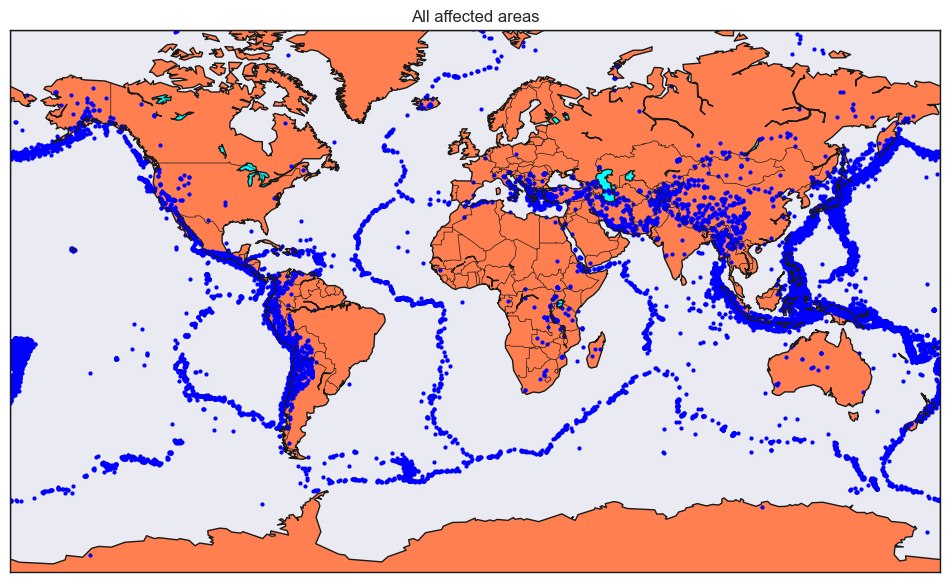

In [57]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.savefig("World Map of All Affected Areas.png")
plt.show()

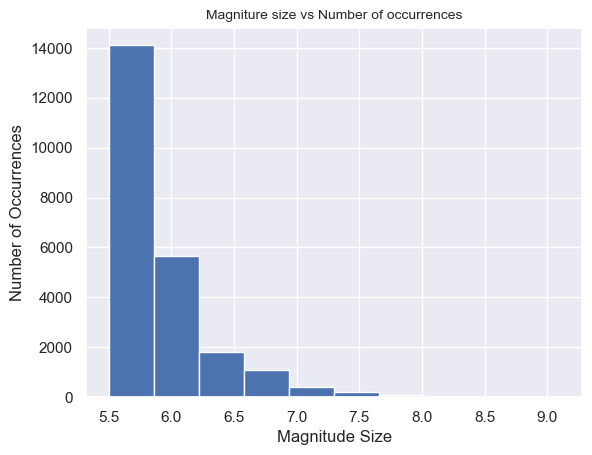

In [58]:
plt.hist(data['Magnitude'])
plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')
plt.title('Magniture size vs Number of occurrences', fontweight = 20, fontsize = 10)
plt.show()

In [59]:
data['date']=data['Date'].apply(lambda x: pd.to_datetime(x))
data['year']=data['date'].apply(lambda x:str(x).split('-')[0])

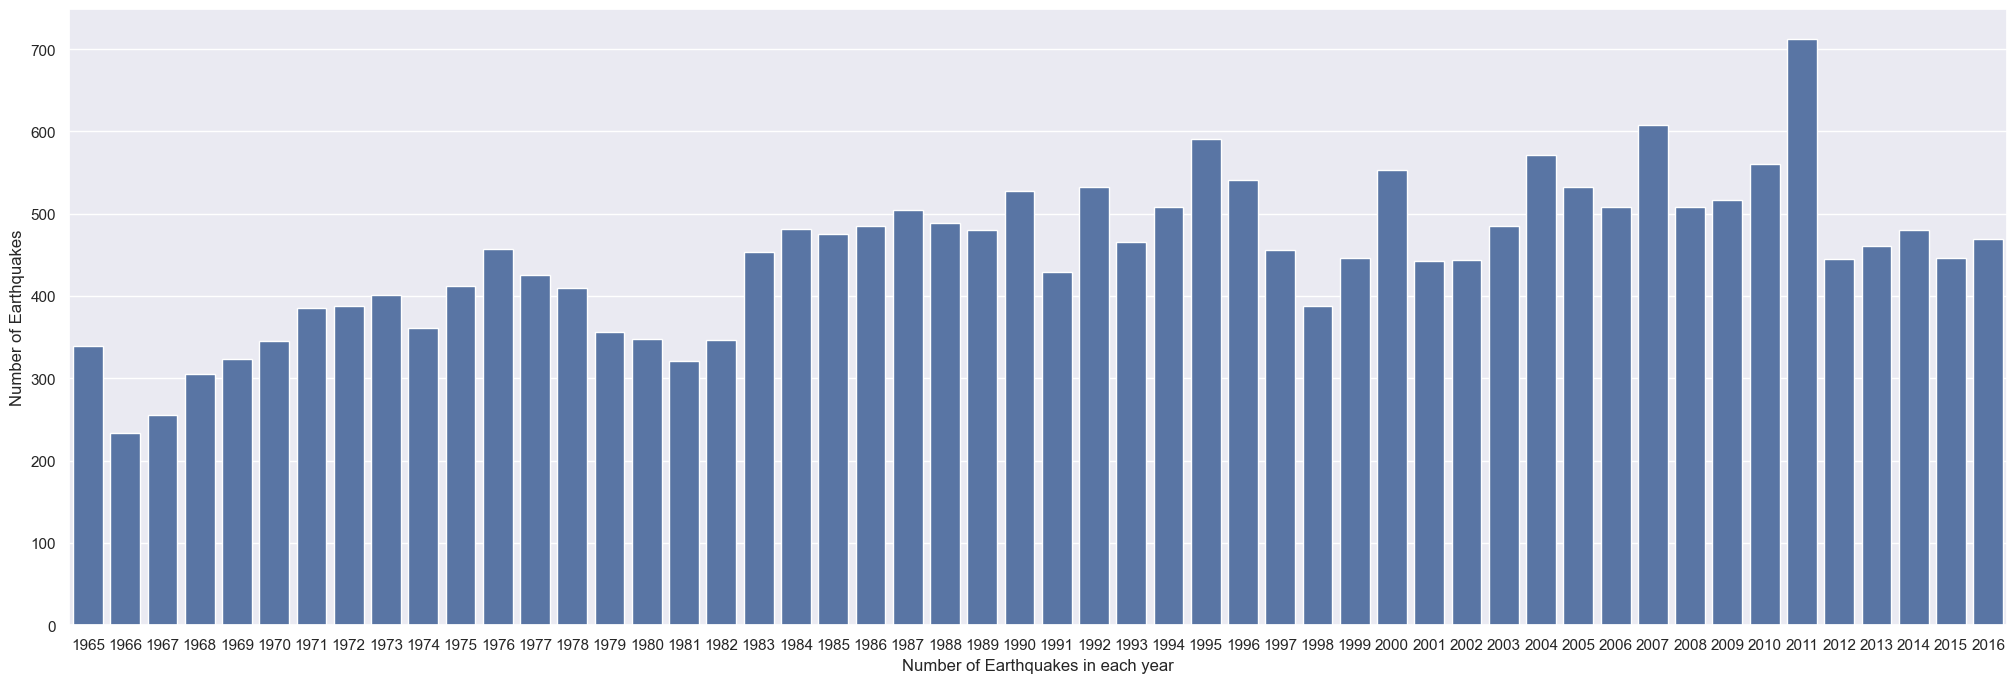

In [60]:
plt.figure(figsize=(25,8))
sns.set(font_scale=1.0)
sns.countplot(x="year",data=data)
plt.ylabel('Number of Earthquakes')
plt.xlabel('Number of Earthquakes in each year')
plt.savefig("Number of Earthquakes in each year.png")


In [61]:
data['year'].value_counts()[::-1]


year
1966    234
1967    255
1968    305
1981    321
1969    323
1965    339
1970    345
1982    346
1980    348
1979    356
1974    361
1971    386
1972    388
1998    388
1973    401
1978    410
1975    412
1977    425
1991    429
2001    443
2002    444
2012    445
2015    446
1999    446
1983    453
1997    456
1976    457
2013    461
1993    466
2016    469
1985    476
1989    480
2014    480
1984    482
1986    485
2003    485
1988    489
1987    505
1994    508
2006    508
2008    508
2009    517
1990    528
1992    533
2005    533
1996    541
2000    553
2010    560
2004    571
1995    591
2007    608
2011    713
Name: count, dtype: int64

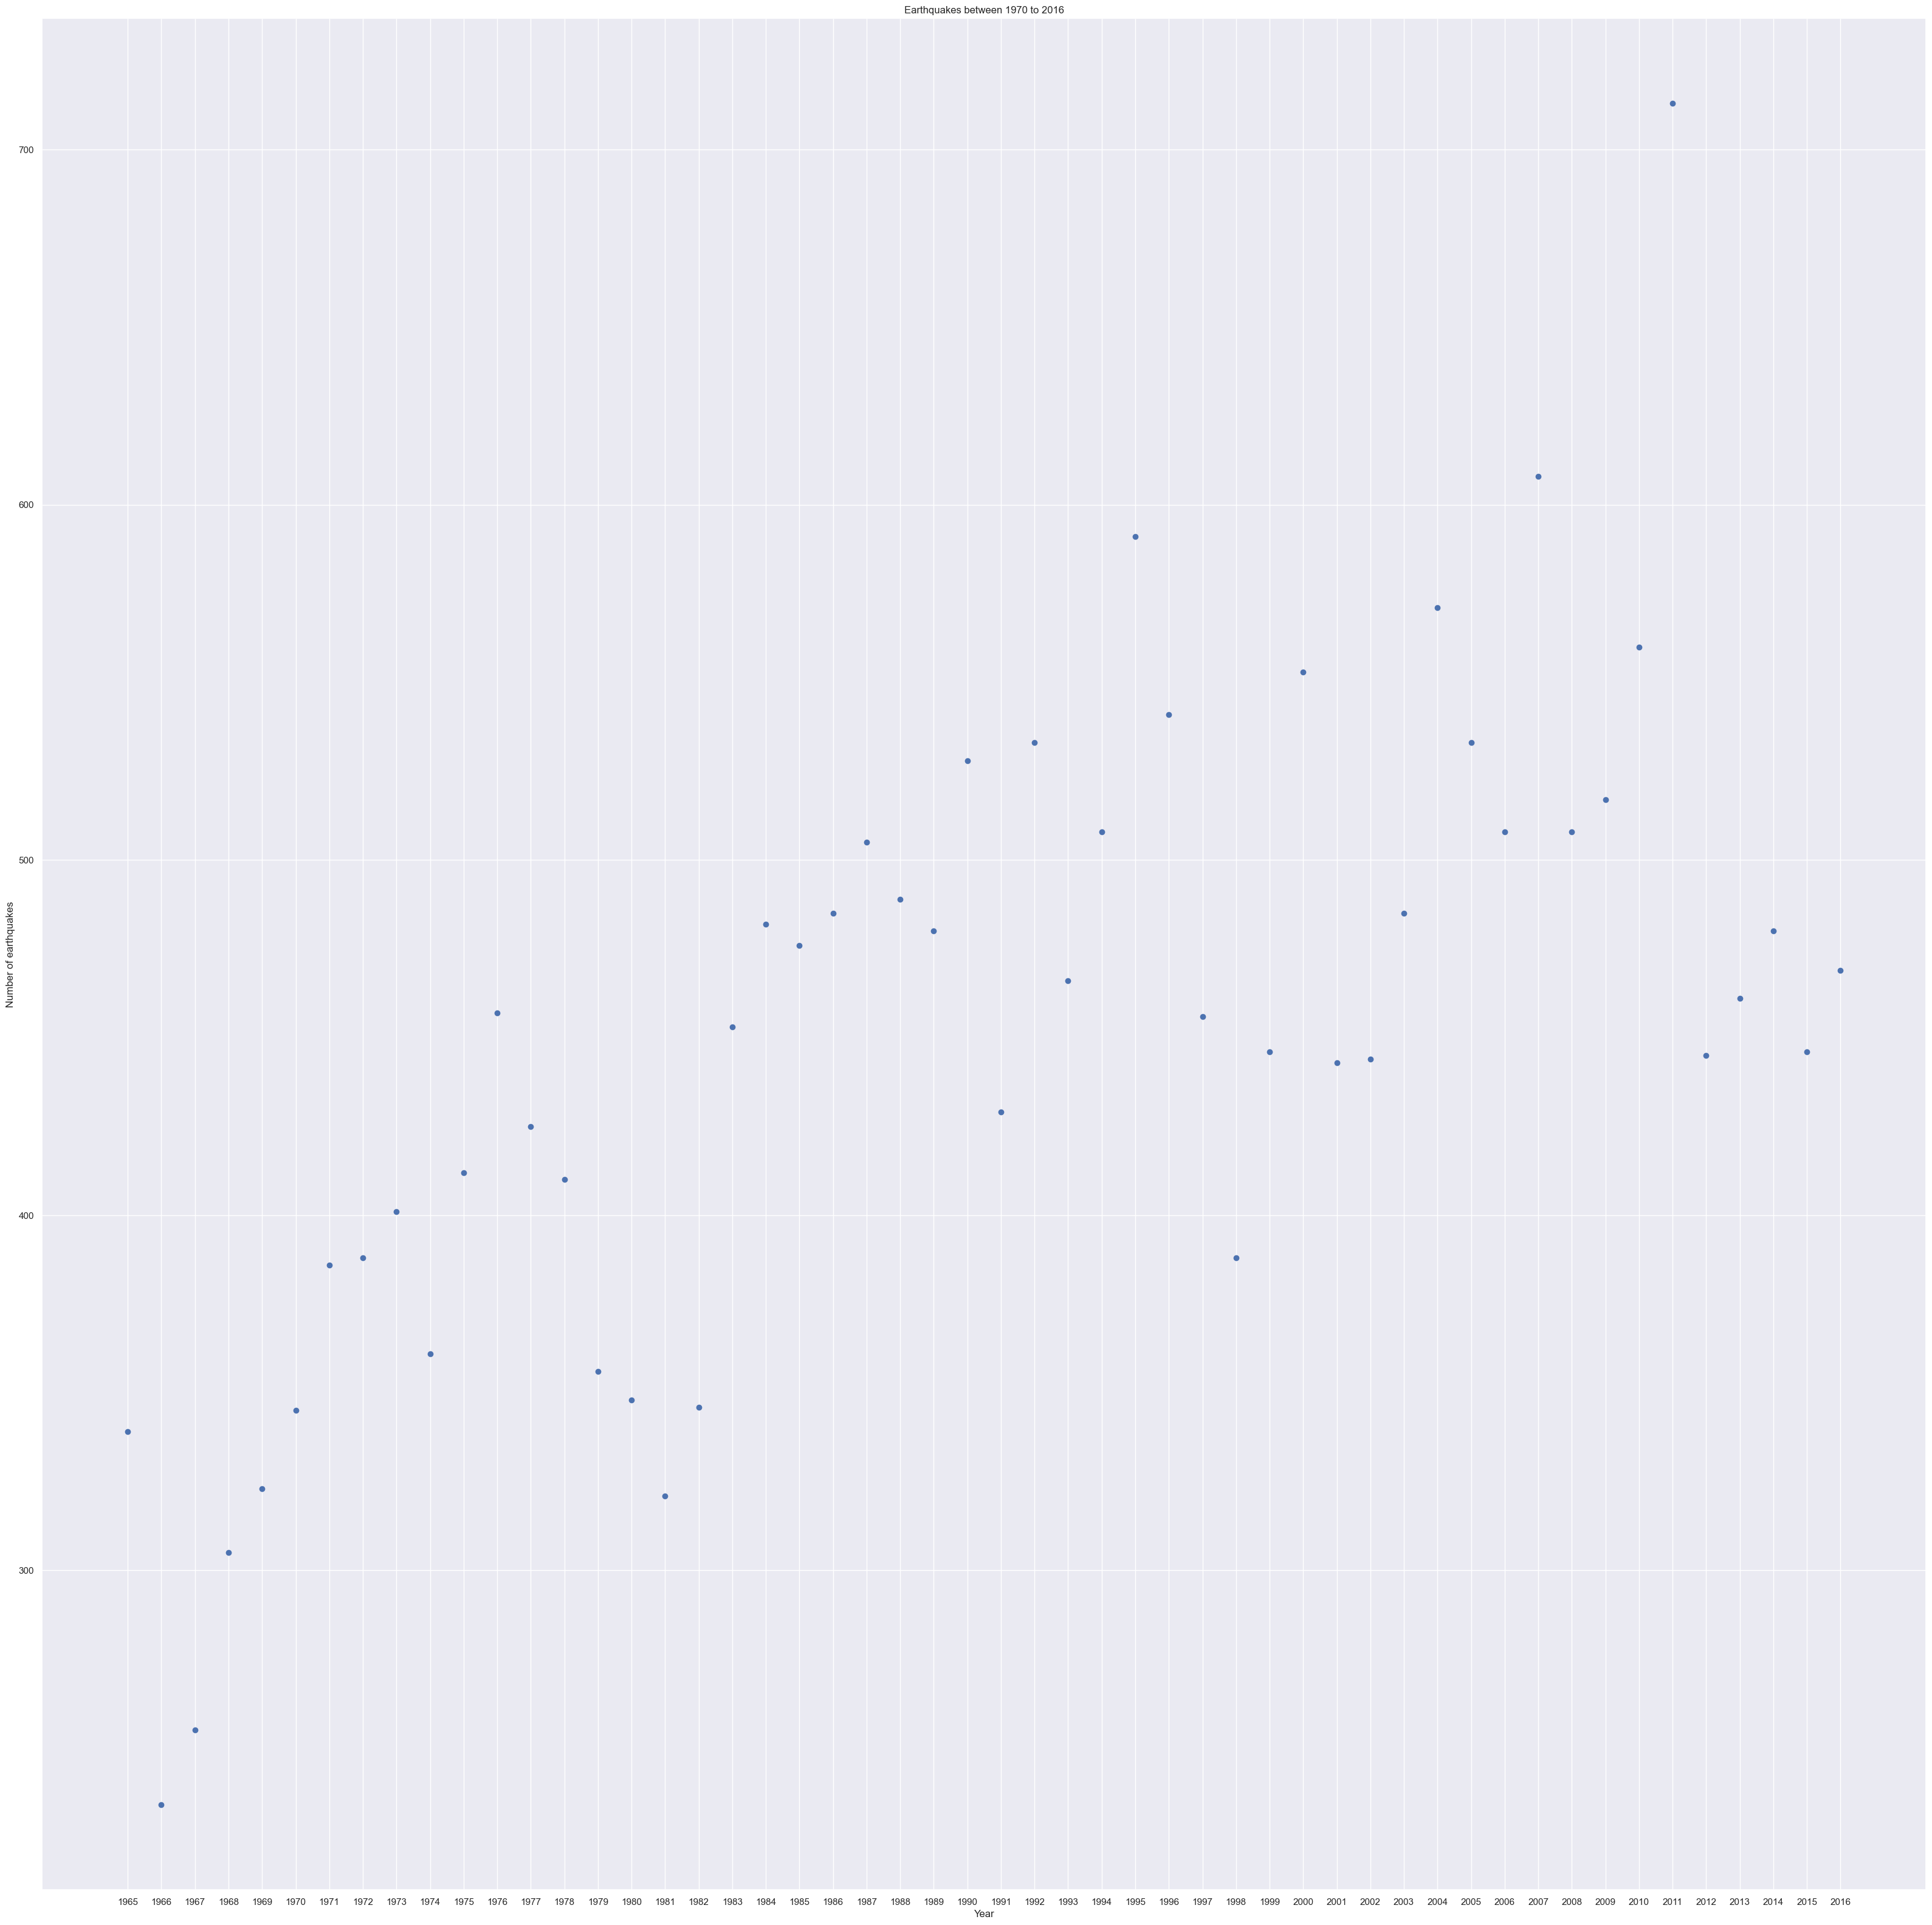

In [62]:
x=data['year'].unique()
y=data['year'].value_counts()
count=[]
for i in range(len(x)):
    count.append(y[x[i]])

plt.figure(figsize=(40,40))    
plt.scatter(x,count)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.title('Earthquakes between 1970 to 2016')
plt.savefig("Earthquakes between 1970 to 2016.png")
plt.show()

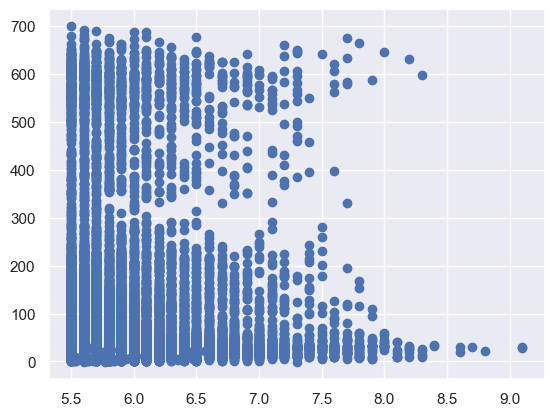

In [63]:
plt.scatter(data["Magnitude"],data["Depth"])

In [64]:
x = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]


In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size = 0.1,
                                                random_state = 42)

In [66]:
print(f"xtrain.shape: {xtrain.shape}")
print(f"ytrain.shape: {ytrain.shape}")
print(f"xtest.shape: {xtest.shape}")
print(f"ytest.shape: {ytest.shape}")


xtrain.shape: (21068, 3)
ytrain.shape: (21068, 2)
xtest.shape: (2341, 3)
ytest.shape: (2341, 2)


In [67]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)
rf_model.score(xtrain, ytrain)

0.9142511576109844

In [68]:
rf_model.predict(xtest)

array([[  5.894 ,  48.67  ],
       [  5.796 ,  32.0238],
       [  5.955 ,  38.021 ],
       ...,
       [  5.735 ,  39.066 ],
       [  5.724 ,  31.63  ],
       [  5.746 , 118.6   ]])